# Emotion Classification in Tweets Using Data Analysis and Natural Language Processing 

- author: Ayla Orucevic
- @xaylax

## To-Dos - WIP
- Try and come up with some simple "rules" for classifying text as happy or sad.  Can be as simple as does this text contain the word sad in it.
- Play around with Spacy.  Just get a sense of how to use it, what kind of information can be extracted.  
- Make a plot of the # of instances of class obscene that have each feature I think of, and a plot of the raw counts (check out matplotlib and seaborn)
- use spacy and pandas apply to make a column with the part of speech tags.
- Use apply to make a column is_sad 1,0 does the content column contain the words sad.
- see how often the sad feature occurs with the sadness label, and how often it occurs with other emotions.

Interesting things to look into: 🌟

- do multiple authors show up?
  - if so, find trends in what kinds of tweets they post- are they all usually sad or happy?
- what word is the most popular amongst sad/happy/excited/neutral tweets? Remove stop words...
- ✅ plot how many tweets of each emotion there are


In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy

In [27]:
df = pd.read_csv("text_emotion.csv")

In [61]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       40000 non-null  int64 
 1   sentiment      40000 non-null  object
 2   author         40000 non-null  object
 3   content        40000 non-null  object
 4   split_content  40000 non-null  object
 5   number         40000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.8+ MB
None
           tweet_id   number
count  4.000000e+04  40000.0
mean   1.845184e+09      1.0
std    1.188579e+08      0.0
min    1.693956e+09      1.0
25%    1.751431e+09      1.0
50%    1.855443e+09      1.0
75%    1.962781e+09      1.0
max    1.966441e+09      1.0


## Graphing the dataset

Populating the interactive namespace from numpy and matplotlib


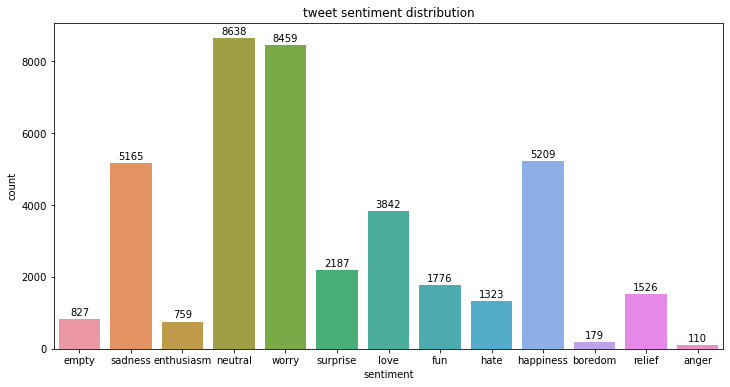

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go

%pylab inline

# sort of don't understand why adding the rest_index gets rid of the Series error with sentiment in the funnel??
temp = df.groupby('sentiment').count()['content'].reset_index().sort_values(by='content',ascending=False) 
plt.figure(figsize=(12,6))
total = float(len(df))
bars = sns.countplot(x='sentiment',data=df)
plt.title("tweet sentiment distribution")

# display column values
for p in bars.patches:
    height = p.get_height()
    bars.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.0f}'.format(height),
            ha="center") 
show()

fig = go.Figure(go.Funnelarea(
    text = temp.sentiment,
    values = temp.content,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [48]:
# apply function
def my_split(x):
    return x.split()

df["split_content"] = df["content"].apply(my_split)  # lambda x: x.split())

# Try and use spacy and pandas apply to make a column with the part of speach tags.

# Use apply to make a column is_sad 1,0 does the content column contain the words sad.

# Filtering in pandas
df[df["sentiment"] == "sadness"]

# numpy
df.loc[np.where(np.array(df["sentiment"].tolist()) == "sadness")]

,tweet_id,sentiment,author,content,split_content,number
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,"[Layin, n, bed, with, a, headache, ughhhh...wa...",1
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,"[Funeral, ceremony...gloomy, friday...]",1
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ...","[I, should, be, sleep,, but, im, not!, thinkin...",1
8,1956969035,sadness,nic0lepaula,@charviray Charlene my love. I miss you,"[@charviray, Charlene, my, love., I, miss, you]",1
9,1956969172,sadness,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?,"[@kelcouch, I'm, sorry, at, least, it's, Friday?]",1
...,...,...,...,...,...,...
39882,1753887579,sadness,Uhmm_ellee,Heaps keen for next weekend. Mummy. &lt;3,"[Heaps, keen, for, next, weekend., Mummy., &lt;3]",1
39894,1753902385,sadness,bobbi85710,@renagades Have a great day..... if the rain k...,"[@renagades, Have, a, great, day....., if, the...",1
39909,1753902771,sadness,tormodgibson,@Ssisch Hmmm... Sisch &amp; sound design. So w...,"[@Ssisch, Hmmm..., Sisch, &amp;, sound, design...",1
39939,1753903509,sadness,wonder_nat,@watermelon39 haha! And Twitter! Hard though i...,"[@watermelon39, haha!, And, Twitter!, Hard, th...",1


In [30]:
df["number"] = 1
arr = np.array(df["number"].tolist())

In [31]:
df["content"][0]

'@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =['

In [40]:
import en_core_web_sm

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = en_core_web_sm.load()

# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'can', 'tell', 'would', 'shake', 'turn', 'talk', 'say']
Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
Recode LOC
earlier this week DATE


In [33]:
# Try to come up with some words "features" for if a comment is obscene
# Make a plot of the # of instances of class obscene that have each feature I think of, and a plot of the raw counts


In [41]:
[(t, t.pos_) for t in doc]

[(When, 'ADV'),
 (Sebastian, 'PROPN'),
 (Thrun, 'PROPN'),
 (started, 'VERB'),
 (working, 'VERB'),
 (on, 'ADP'),
 (self, 'NOUN'),
 (-, 'PUNCT'),
 (driving, 'VERB'),
 (cars, 'NOUN'),
 (at, 'ADP'),
 (Google, 'PROPN'),
 (in, 'ADP'),
 (2007, 'NUM'),
 (,, 'PUNCT'),
 (few, 'ADJ'),
 (people, 'NOUN'),
 (outside, 'ADP'),
 (of, 'ADP'),
 (the, 'DET'),
 (company, 'NOUN'),
 (took, 'VERB'),
 (him, 'PRON'),
 (seriously, 'ADV'),
 (., 'PUNCT'),
 (“, 'PUNCT'),
 (I, 'PRON'),
 (can, 'VERB'),
 (tell, 'VERB'),
 (you, 'PRON'),
 (very, 'ADV'),
 (senior, 'ADJ'),
 (CEOs, 'NOUN'),
 (of, 'ADP'),
 (major, 'ADJ'),
 (American, 'ADJ'),
 (car, 'NOUN'),
 (companies, 'NOUN'),
 (would, 'VERB'),
 (shake, 'VERB'),
 (my, 'DET'),
 (hand, 'NOUN'),
 (and, 'CCONJ'),
 (turn, 'VERB'),
 (away, 'ADV'),
 (because, 'SCONJ'),
 (I, 'PRON'),
 (was, 'AUX'),
 (n’t, 'PART'),
 (worth, 'ADJ'),
 (talking, 'VERB'),
 (to, 'ADP'),
 (,, 'PUNCT'),
 (”, 'PUNCT'),
 (said, 'VERB'),
 (Thrun, 'PROPN'),
 (,, 'PUNCT'),
 (in, 'ADP'),
 (an, 'DET'),
 (interv

In [42]:
# dependency parsing - a very cool way to visualize sentences.
# This can show you the relationships between words in a sentence, a cool way to explore nlp data.

s = "Doing natural language processing is super fun!"
doc = nlp(s)
displacy.serve(doc, style="dep")

C:\Users\aylao\anaconda3\lib\site-packages\spacy\displacy\__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## Data Cleaning

In [139]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [140]:
df['content'] = df['content'].apply(lambda x:clean_text(x))

In [148]:
df.head()

,tweet_id,sentiment,author,content,split_content,number,temp_list
0,1956967341,empty,xoshayzers,tiffanylue i know i was listenin to bad habit...,"[@tiffanylue, i, know, i, was, listenin, to, b...",1,"[tiffanylue, i, know, i, was, listenin, to, ba..."
1,1956967666,sadness,wannamama,layin n bed with a headache ughhhhwaitin on y...,"[Layin, n, bed, with, a, headache, ughhhh...wa...",1,"[layin, n, bed, with, a, headache, ughhhhwaiti..."
2,1956967696,sadness,coolfunky,funeral ceremonygloomy friday,"[Funeral, ceremony...gloomy, friday...]",1,"[funeral, ceremonygloomy, friday]"
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends soon,"[wants, to, hang, out, with, friends, SOON!]",1,"[wants, to, hang, out, with, friends, soon]"
4,1956968416,neutral,xkilljoyx,dannycastillo we want to trade with someone wh...,"[@dannycastillo, We, want, to, trade, with, so...",1,"[dannycastillo, we, want, to, trade, with, som..."


## Most common words in our text
- they're all stopwords :((

In [ ]:
# remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

def remove_stops(column):
    my_list = df['content']
    meaningful_words = [w for w in my_list if not w in stop]
    return (meaningful_words)

df['content'] = df.apply(remove_stops, axis=1)

In [ ]:
df.head()

In [ ]:
from collections import Counter

df['temp_list'] = df['content'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')